# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [291]:
print("Фиксируем сиды для воспроизводимости результатов при каждом новом запуске кода")

Фиксируем сиды для воспроизводимости результатов при каждом новом запуске кода


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [5]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [293]:
# save df_test to csv
df_test.to_csv('df_test.csv', index=False)

(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [294]:
df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [295]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [296]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>.
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [297]:
df_train.describe(include = 'all') # include = 'all' means include all columns

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [298]:
df_test.describe(include = 'all') # include = 'all' means include all columns

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [299]:
train_columns_with_na = df_train.columns[df_train.isna().any()].tolist()
print(train_columns_with_na)

test_columns_with_na = df_test.columns[df_test.isna().any()].tolist()
print(test_columns_with_na)

['mileage', 'engine', 'max_power', 'torque', 'seats']
['mileage', 'engine', 'max_power', 'torque', 'seats']


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [300]:
df_train_features = df_train.drop('selling_price', axis = 1) # axis = 1 means columns
duplicated_rows = df_train_features[df_train_features.duplicated()]
print('Объекты с одинаковым признаковым описанием: ' + str(duplicated_rows.shape[0]))

Объекты с одинаковым признаковым описанием: 1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [301]:
duplicated_rows

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [302]:
df_train = df_train.drop_duplicates(subset = df_train_features.columns,keep = 'first')
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [303]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [304]:
df_train = df_train.reset_index(drop = True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая:
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``.
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [305]:
import re
columns_to_convert = ['mileage', 'engine', 'max_power']

def extract1(text):
  A = list(filter(bool, re.findall(r'[0-9.]*', text)))
  return A[0] if A else None

def extract2(text):
  A = list(filter(bool, re.findall(r'[0-9.]*', text)))
  return A[-1] if A else None

for df in [df_train, df_test]:
  df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.replace('[^0-9.]', '', regex = True))
  df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
  df[columns_to_convert] = df[columns_to_convert].astype(float)

  df['torque'] = df['torque'].str.replace(',', '')
  df['torque'] = df['torque'].astype(str)

  df['torque_old'] = df['torque']

  df['torque'] = df['torque_old'].apply(lambda x: extract1(x))
  df['max_torque_rpm'] = df['torque_old'].apply(lambda x: extract2(x))
  df['torque'] = df['torque'].astype(float)
  df['max_torque_rpm'] = df['max_torque_rpm'].astype(float)

df_train = df_train.drop(columns=['torque_old'])
df_test = df_test.drop(columns=['torque_old'])

df_train


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.00,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.00,5.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.40,5.0,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.50,5.0,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75,5.0,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.10,5.0,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90.00,5.0,3500.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.70,5.0,4000.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,24.00,5.0,2750.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [306]:
train_columns_with_na = df_train.columns[df_train.isna().any()].tolist()
test_columns_with_na = df_test.columns[df_test.isna().any()].tolist()

df_train[train_columns_with_na] = df_train[train_columns_with_na].fillna(df_train[train_columns_with_na].median())
df_test[test_columns_with_na] = df_test[train_columns_with_na].fillna(df_train[train_columns_with_na].median())
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.00,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.00,5.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.40,5.0,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.50,5.0,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75,5.0,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.10,5.0,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90.00,5.0,3500.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.70,5.0,4000.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,24.00,5.0,2750.0


In [307]:
train_columns_with_na = df_train.columns[df_train.isna().any()].tolist()
train_columns_with_na

[]

In [308]:
test_columns_with_na = df_test.columns[df_test.isna().any()].tolist()
test_columns_with_na

[]


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [309]:
print("seats лучше сделать категориальной, т.к. она имеет ограниченное количество значений и не факт, что цена монотонно возрастает / снижается при росте seats")

seats лучше сделать категориальной, т.к. она имеет ограниченное количество значений и не факт, что цена монотонно возрастает / снижается при росте seats


In [310]:
df_list = [df_train, df_test]
columns_int = ['engine', 'seats']

for df in df_list:
  df[columns_int] = df[columns_int].astype(int)

df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.00,5,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.00,5,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.40,5,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,11.50,5,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75,5,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,96.10,5,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90.00,5,3500.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.70,5,4000.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,24.00,5,2750.0


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.pairplot()`` позволяет сделать это в одну строчку

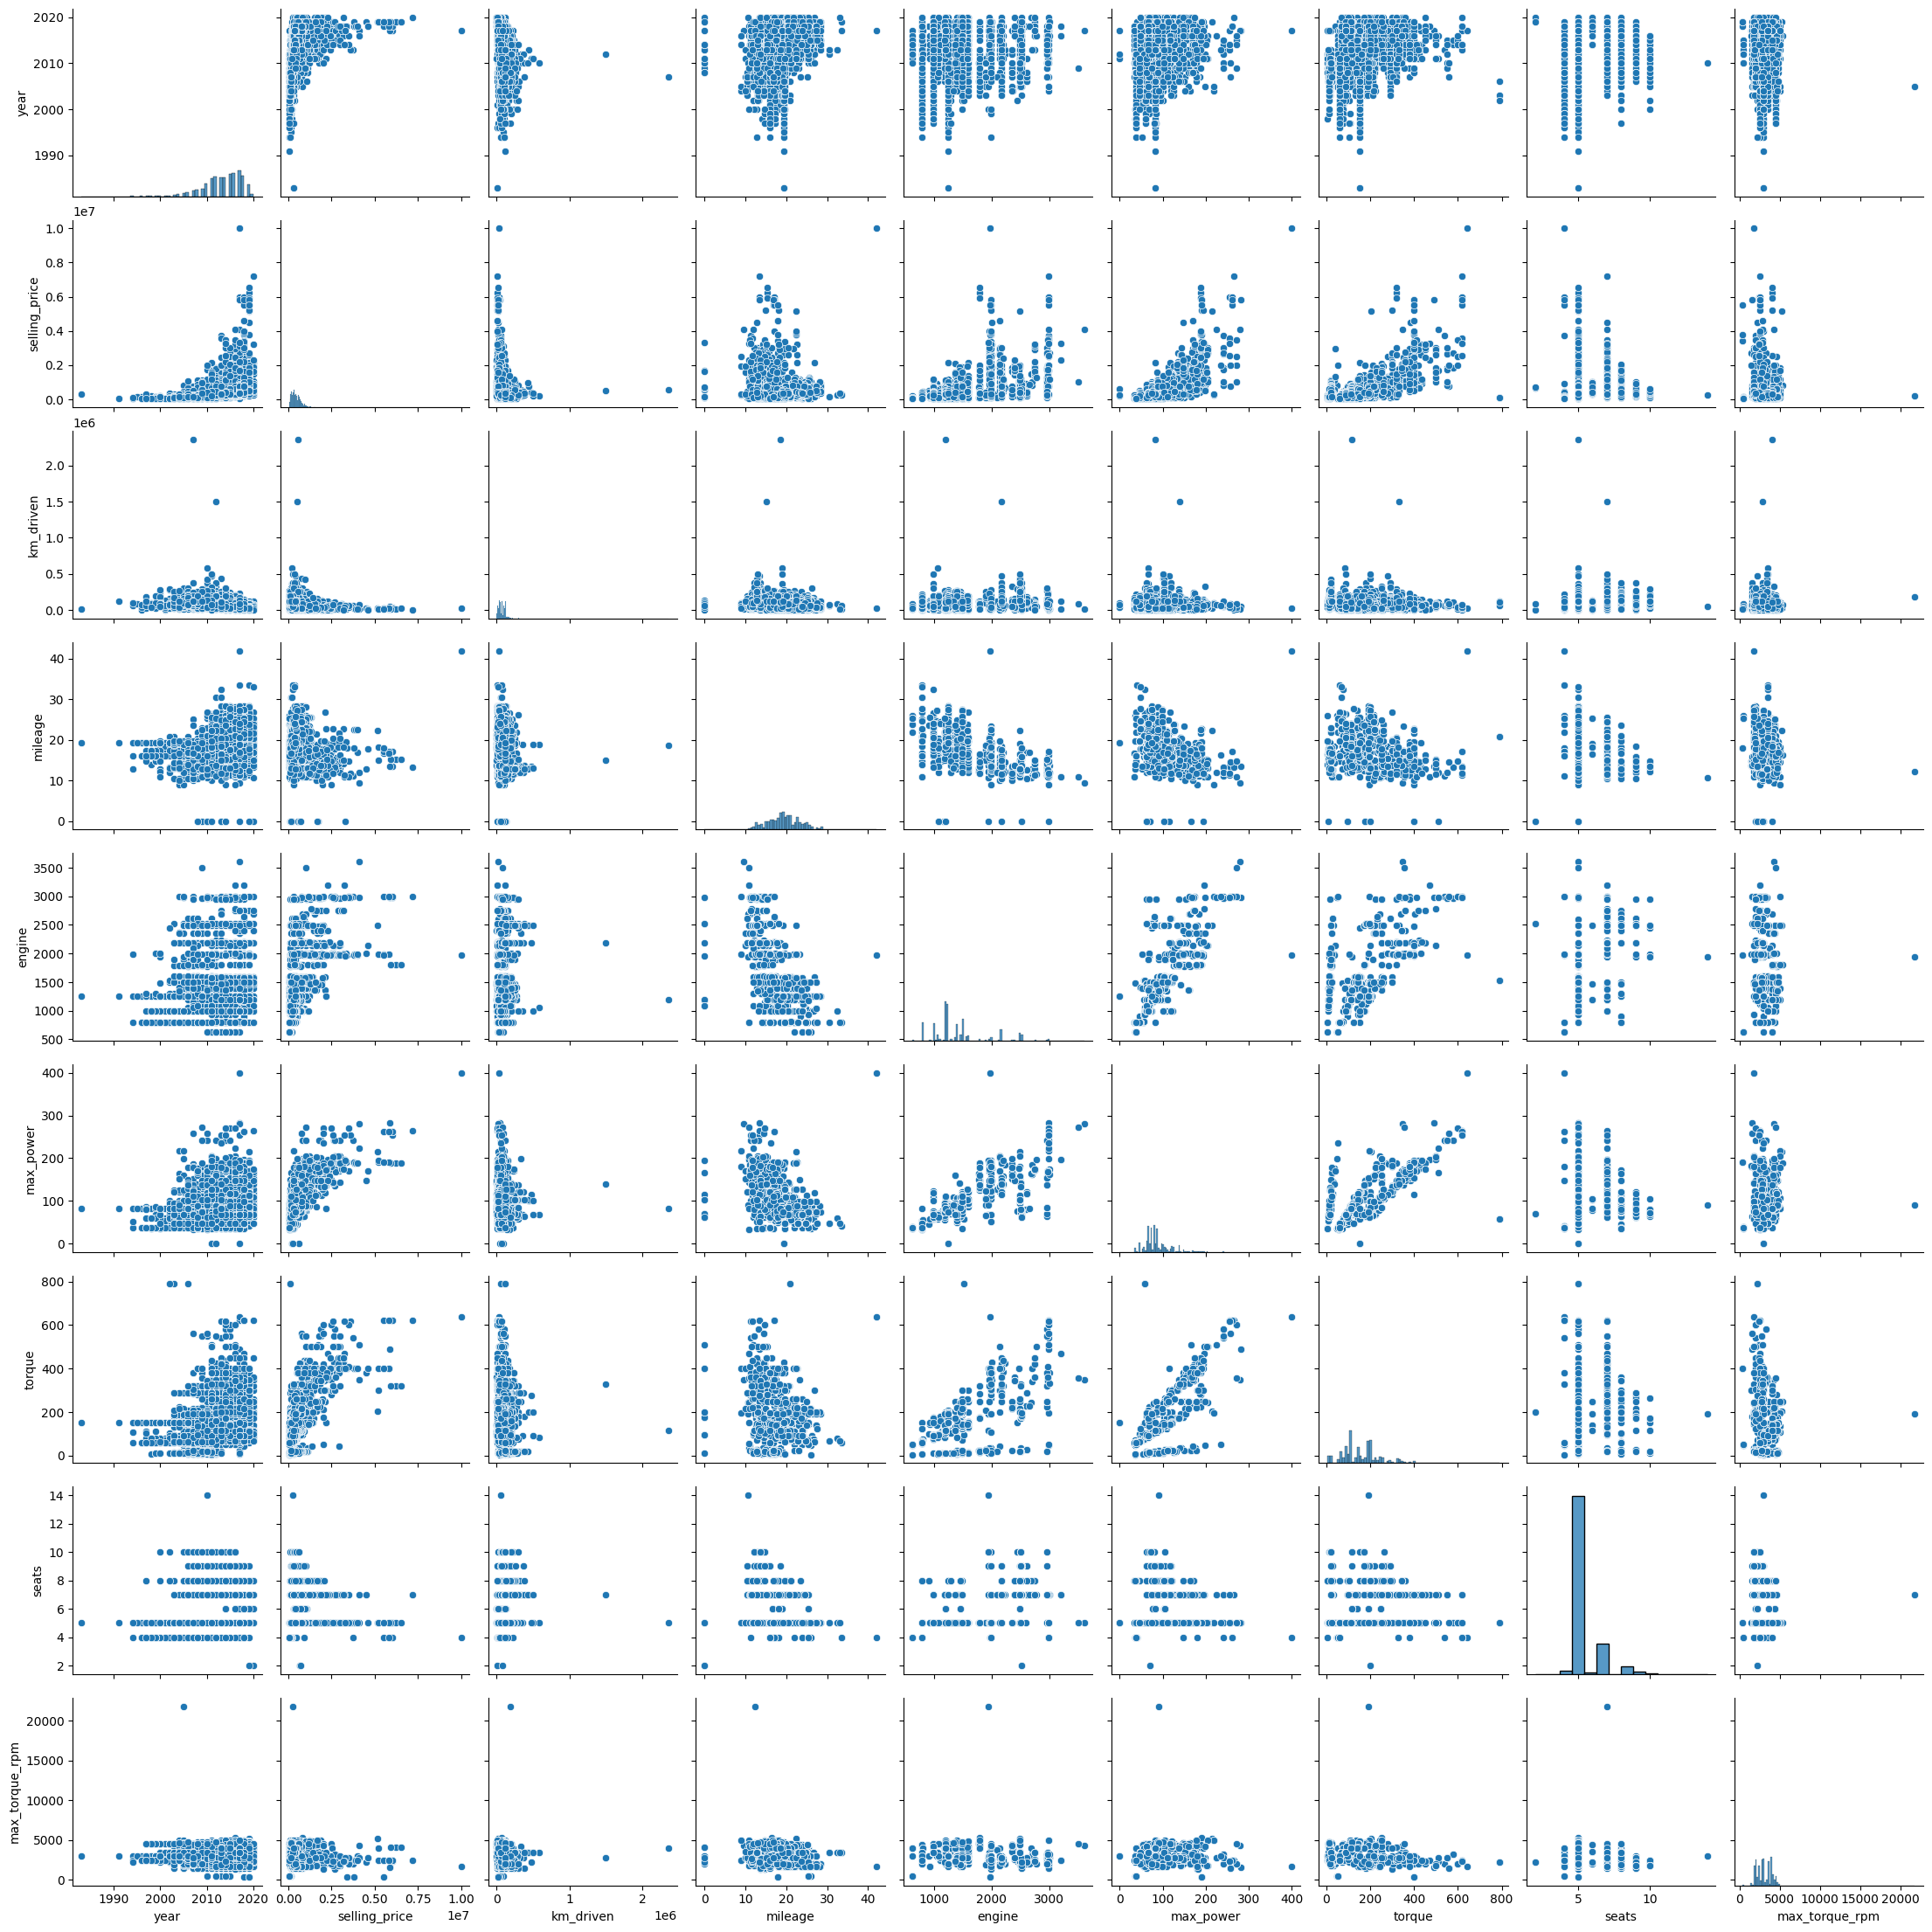

In [311]:
#df_train_features = df_train.drop(columns=['selling_price'])
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

*   Связь предикторов с целевой переменной: наибольшие значения selling_price достигаются при низком km_driven, высоком year и высоком max_power.

*   Корреляция признаков: engine и max_power положительно коррелируют, engine и mileage отрицательно коррелируют. По остальным сложно сказать.



(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

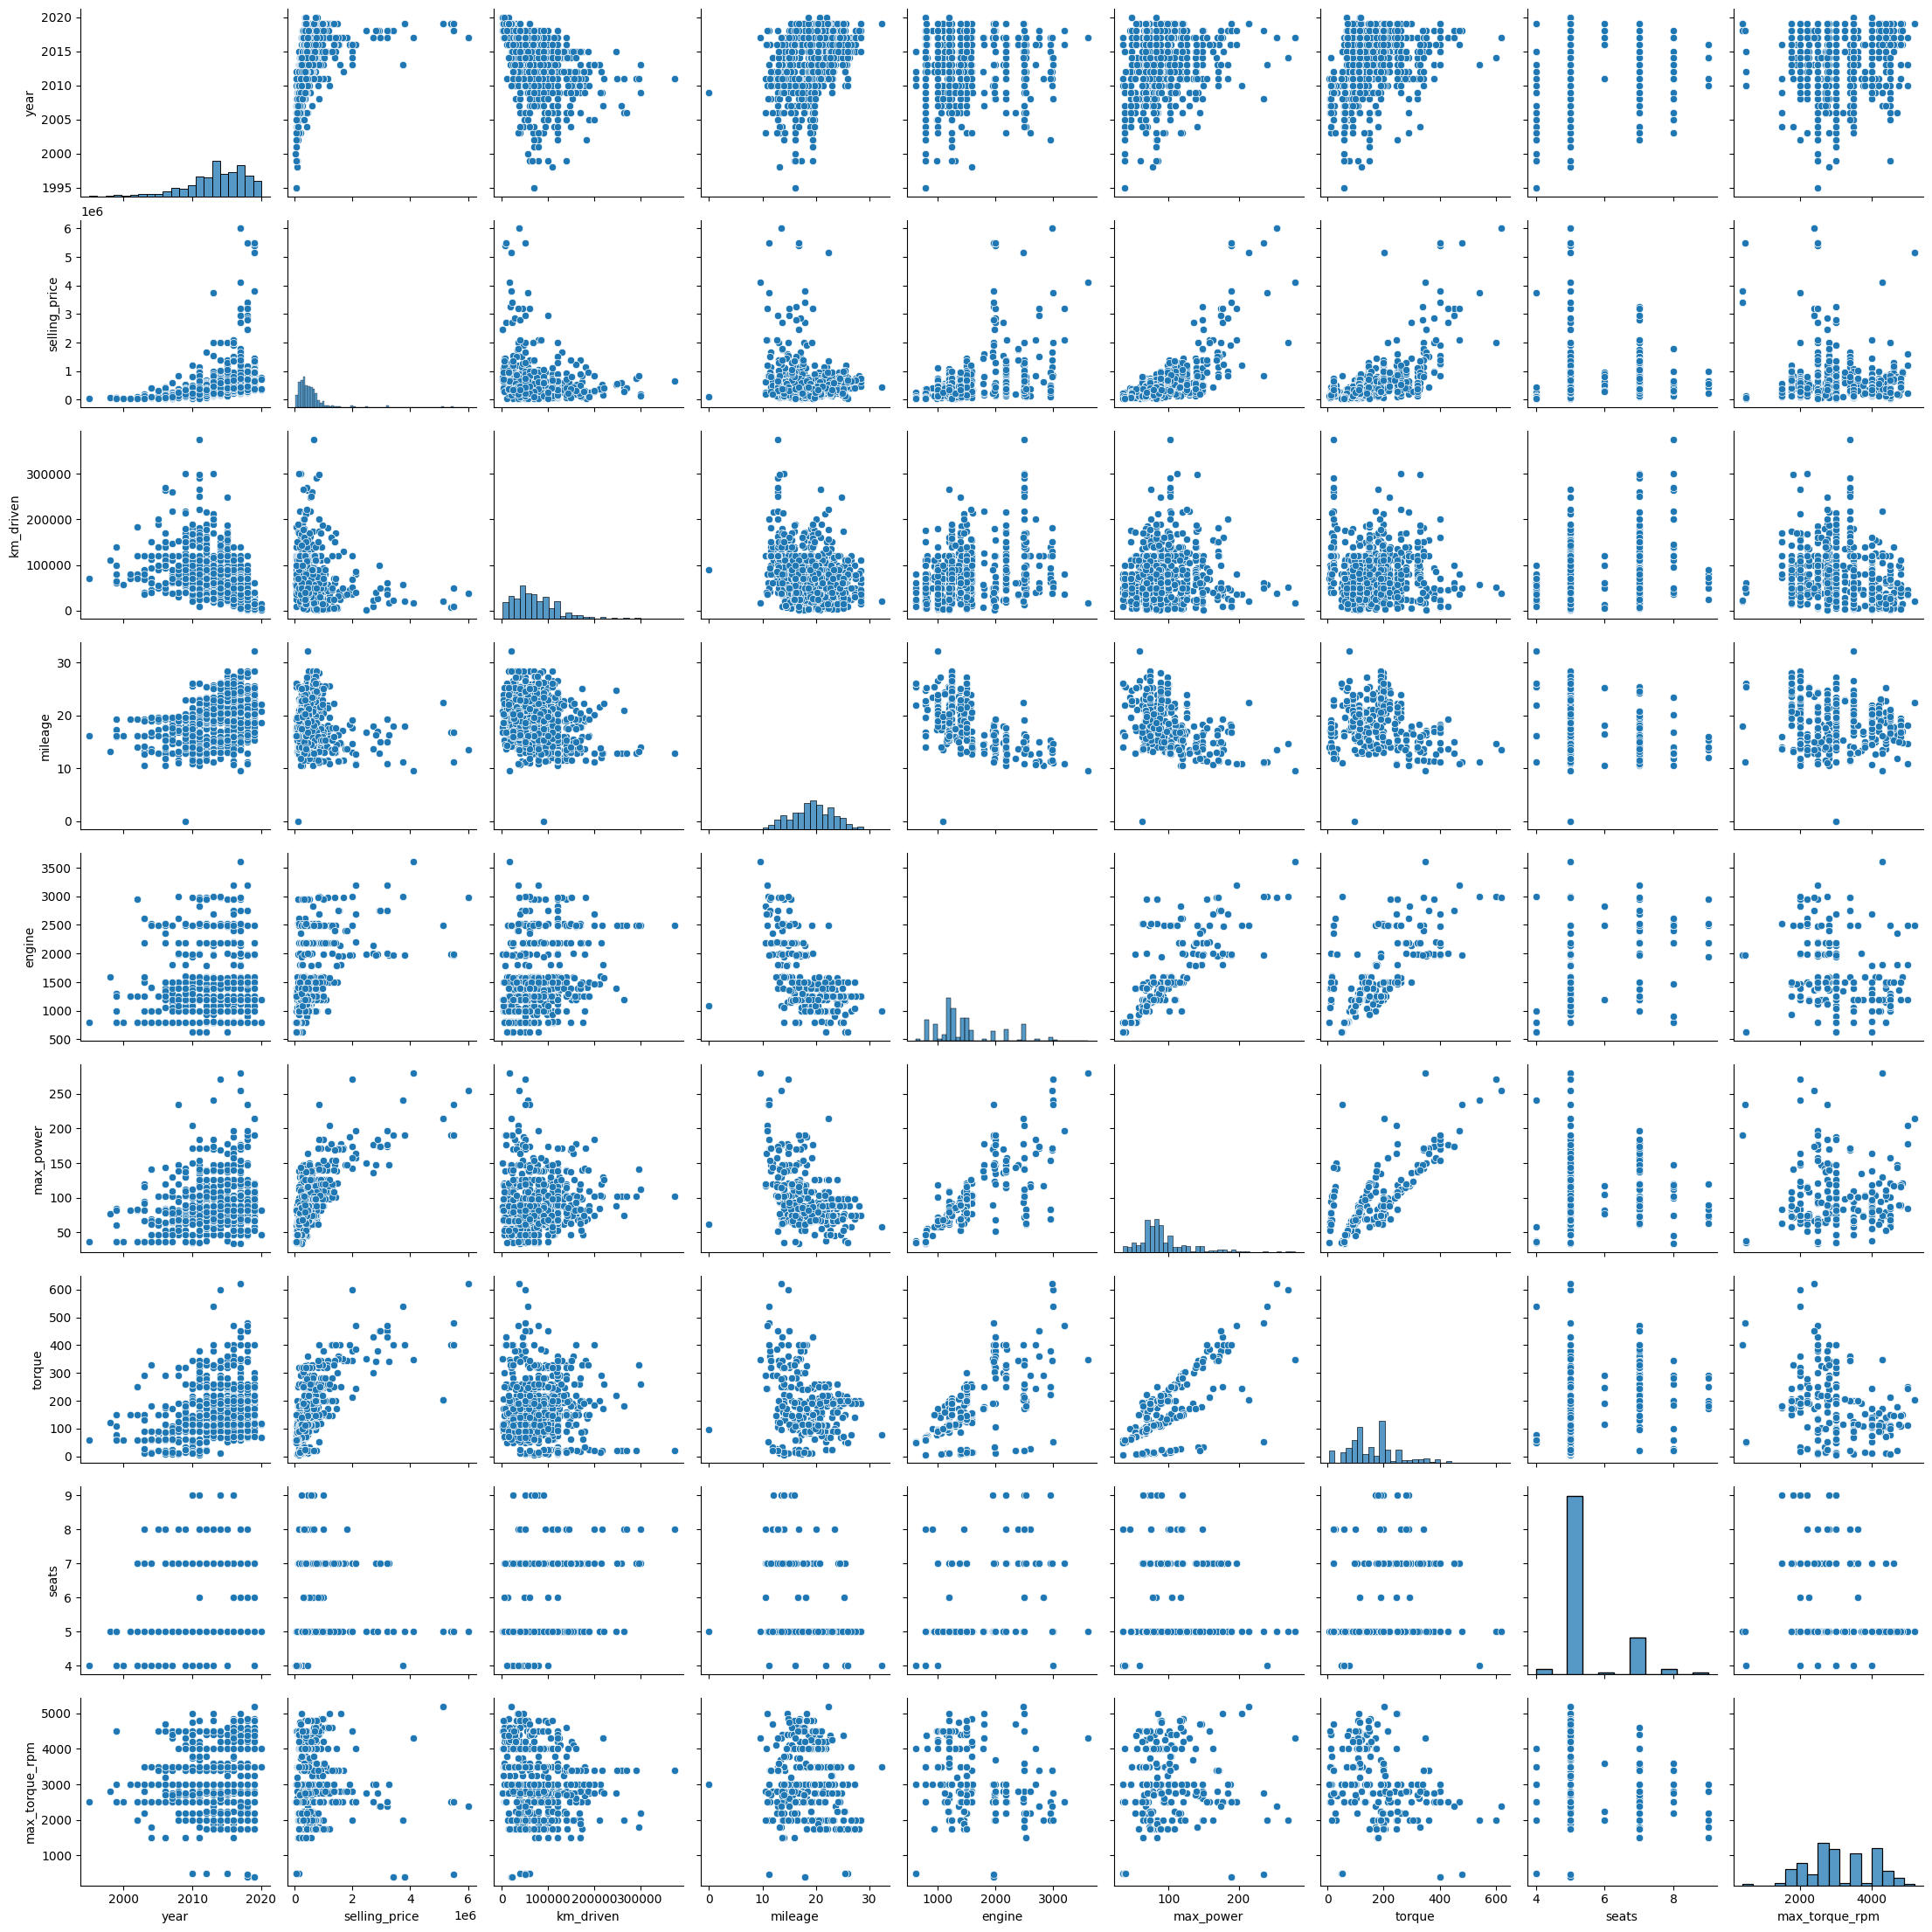

In [312]:
sns.pairplot(df_test)

test и train в целом похожи, но есть некоторые различия
- в train есть более дорогие автомобили, которых нету в test
- в train есть аутлайеры с особо большими (max torque_rpm, max_power, seats итд), которых нету в test

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<ipython-input-313-83dfaaf1f62f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_corr = df_train_features.corr()


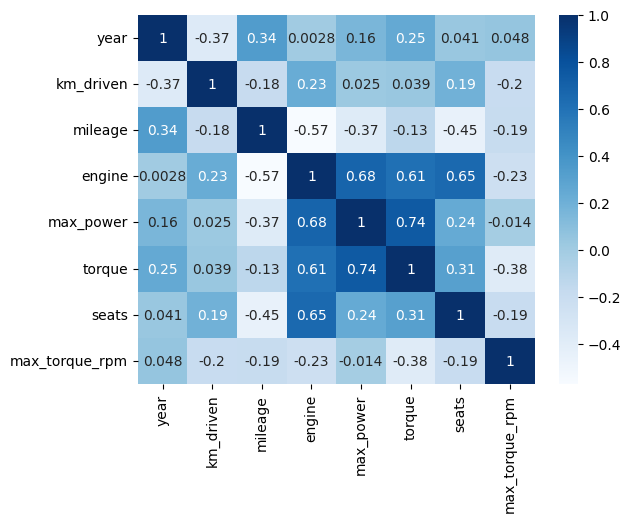

In [313]:
df_train_features = df_train.drop(columns=['selling_price'])

train_corr = df_train_features.corr()
sns.heatmap(train_corr, cmap="Blues", annot=True);

Ответьте, пожалуйста, на вопросы:
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>


*   2 признака наименее скоррелированы между собой: year и engine (по модулю корреляции), mileage и engine (самое отрицательное значение)
*   довольно сильная положительная линейная зависимость: engine и max_power
*   чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи: корелляция отрицательная, но утверждать нельзя (слишком маленьком абслолютное значение 0.37)

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<Axes: xlabel='engine', ylabel='max_power'>

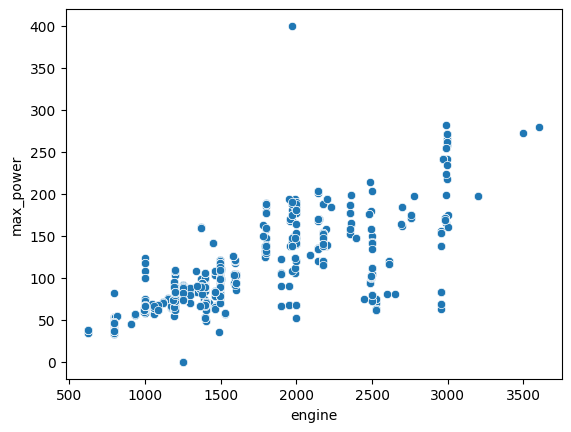

In [314]:
sns.scatterplot(x = df_train_features['engine'], y = df_train_features['max_power'])

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

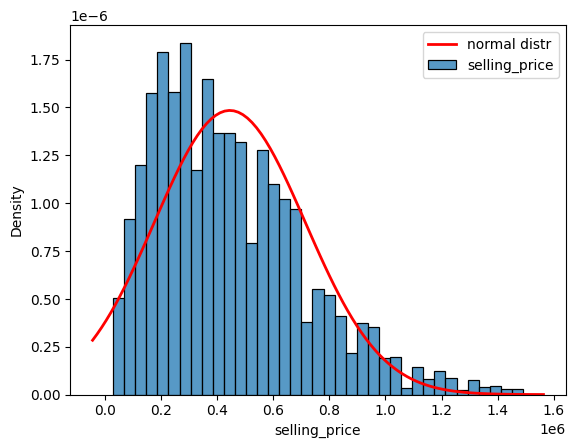

In [315]:
from scipy.stats import norm

limit = 1500000
values_train = df_train[df_train['selling_price'] < limit]['selling_price'] # limit values for the chart
ax = sns.histplot(x = values_train, kde=False, stat='density', label='selling_price')


# calculate the pdf
mu, std = norm.fit(values_train)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

ax.plot(x, p, 'r', lw=2, label='normal distr')
ax.legend()





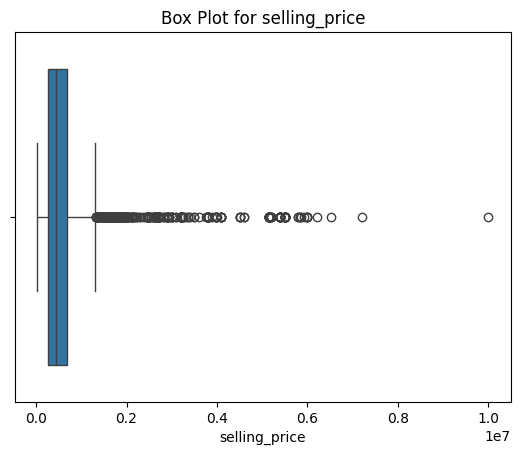

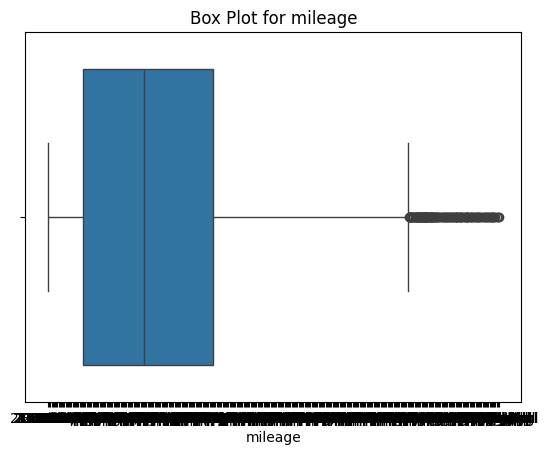

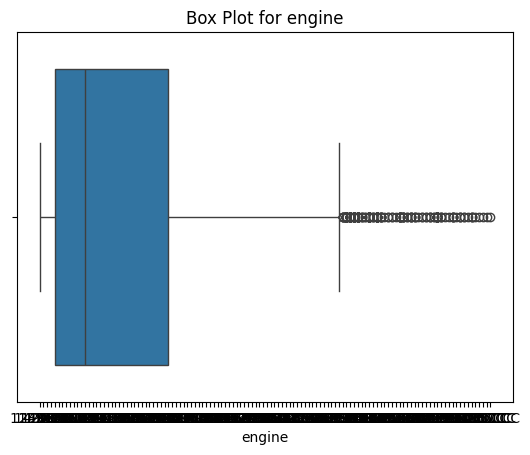

In [8]:
# Сделаем Box plots для selling_price и пары фичек
values = df_train['selling_price']      
ax = sns.boxplot(x = values)
ax.set_title(f'Box Plot for selling_price')
plt.show()                



values = df_train['mileage']
ax = sns.boxplot(x = values)
ax.set_title(f'Box Plot for mileage')
plt.show()   


values = df_train['engine']                   
ax = sns.boxplot(x = values)
ax.set_title(f'Box Plot for engine')
plt.show()  

Исходя из распределения Selling_price, в выборке больше относительно дешёвых автомобилей, чем было бы при нормальном распределении
Видим значительное количество выбросов в Selling_price, mileage, engine - возможно они есть и в других признаках

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [316]:
drop_columns = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'selling_price']

X_train = df_train.drop(columns = drop_columns)
y_train = df_train['selling_price']


In [317]:
#assert X_train.shape == (5840, 6) # убрали, исходя из совета в ТГ

In [318]:
y_test = df_test['selling_price']
X_test = df_test.drop(columns = drop_columns)

In [319]:
#assert X_test.shape == (1000, 6)  убрали, исходя из совета в ТГ

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [320]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
print("MSE_score: ", MSE(y_test, prediction))
print("r2_score: ", r2_score(y_test, prediction))


MSE_score:  226580166397.0907
r2_score:  0.6058300093574247


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [321]:
import pickle
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

### Scaler for pickle file (without seats)

scaler2 = StandardScaler()
scaler2.fit(X_train.drop(columns = 'seats'))

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler2, file)

### Scaler for pickle file (without seats)

X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


model = LinearRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
print("MSE_score: ", MSE(y_test, prediction))
print("r2_score: ", r2_score(y_test, prediction))
X_train


MSE_score:  226580166397.094
r2_score:  0.6058300093574189


,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
0,0.139570,1.191152,0.995867,-0.373643,-0.439550,0.314704,-0.434419,-1.131162
1,0.139570,0.766619,0.428830,0.141162,0.493513,0.972840,-0.434419,-0.586618
2,-0.837167,0.883158,0.895506,-0.068879,0.066175,-1.523691,-0.434419,-0.314345
3,-1.569719,0.766619,-0.835712,-0.270682,0.009281,-1.643253,-0.434419,1.591561
4,0.872122,-0.482007,0.177929,-0.478663,-0.191113,-0.521678,-0.434419,1.047016
...,...,...,...,...,...,...,...,...
5835,-1.325535,1.948653,-0.379072,-0.707236,-0.815684,-0.715280,-0.434419,-0.042073
5836,-0.104614,-0.398765,-0.133189,-0.888447,-0.657645,-0.782191,-0.434419,0.502471
5837,-0.104614,0.600136,-0.233549,-0.478663,-0.159821,-0.522227,-0.434419,1.047016
5838,-1.569719,0.749971,-0.660081,0.130865,0.698332,-1.506141,-0.434419,-0.314345


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [322]:
coeff = pd.DataFrame(model.coef_, index=X_test.columns, columns=['weight'])
coeff = coeff.sort_values(by='weight', ascending = False)
print(coeff)
print(coeff[0:1])

                       weight
max_power       308865.683279
year            161893.598075
torque           36868.888521
engine           17885.259775
mileage         -14347.579592
seats           -32366.994564
km_driven       -48548.732776
max_torque_rpm  -53061.190106
                  weight
max_power  308865.683279


max_power оказался наиболее информативным в предсказании цены

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [323]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
print("MSE_score: ", MSE(y_test, prediction))
print("r2_score: ", r2_score(y_test, prediction))

MSE_score:  226580991719.42203
r2_score:  0.6058285735861443


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [324]:
coeff = pd.DataFrame(model.coef_, index=X_test.columns, columns=['weight'])
coeff = coeff.sort_values(by='weight', ascending = False)
print(coeff)

                       weight
max_power       308866.446493
year            161891.290381
torque           36869.180539
engine           17883.361157
mileage         -14344.171374
seats           -32363.107736
km_driven       -48547.837845
max_torque_rpm  -53058.825172


Не занулила никакие веса со значениями по умолчанию

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [325]:
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
folds = 10
parameters = {'alpha':[0.001, 0.01,0.05, 0.1, 1, 2, 3, 5, 10, 20, 50, 100, 1000, 10000, 15000, 20000, 25000, 50000, 100000]}

grid_search = GridSearchCV(estimator=lasso_model, param_grid=parameters, cv=folds)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 1, 2, 3, 5, 10, 20,
                                   50, 100, 1000, 10000, 15000, 20000, 25000,
                                   50000, 100000]})

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

190 (количество фолдов * длина списка с параметрами alpha)

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [326]:
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

model = Lasso(alpha = best_params['alpha'])
model.fit(X_train, y_train)

prediction = model.predict(X_test)
print("MSE_score: ", MSE(y_test, prediction))
print("r2_score: ", r2_score(y_test, prediction))

coeff = pd.DataFrame(model.coef_, index=X_test.columns, columns=['weight'])
coeff = coeff.sort_values(by='weight', ascending = False)
print(coeff)

print('\n' + 'models_trained: ' + str(len(parameters['alpha']) * folds))

Best Parameters: {'alpha': 20000}
MSE_score:  242371509596.14142
r2_score:  0.578358612809437
                       weight
max_power       292611.152646
year            140654.810033
torque           49298.877069
mileage              0.000000
engine               0.000000
seats               -0.000000
max_torque_rpm  -18911.417653
km_driven       -29226.142514

models_trained: 190


alpha = 20000
Занулились mileage, engine и seats

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [327]:
from sklearn.linear_model import ElasticNet
EN_model = ElasticNet()
folds = 10

parameters = {'alpha':[0.001, 0.01,0.05, 0.1, 1, 2, 3, 5, 10, 20, 50, 100, 1000, 10000, 15000, 20000, 25000, 50000, 100000], 'l1_ratio':[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

grid_search = GridSearchCV(estimator=EN_model, param_grid=parameters, cv=folds)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 1, 2, 3, 5, 10, 20,
                                   50, 100, 1000, 10000, 15000, 20000, 25000,
                                   50000, 100000],
                         'l1_ratio': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                      0.8, 0.9, 1]})

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [328]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

model = ElasticNet(alpha = best_params['alpha'], l1_ratio = best_params['l1_ratio'])
model.fit(X_train, y_train)

prediction = model.predict(X_test)
print("MSE_score: ", MSE(y_test, prediction))
print("r2_score: ", r2_score(y_test, prediction))


Best Parameters: {'alpha': 20000, 'l1_ratio': 1}
MSE_score:  242371509596.14142
r2_score:  0.578358612809437


Предлагаем вам оставить попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [329]:
drop_columns = ['name', 'selling_price']
X_train = X_train.drop(columns = 'seats')
#X_train_cat = df_train.drop(columns = drop_columns)

category_columns = set(df_train.columns).difference(X_train.columns) # select new columns in df_train that aren't present in X_train
X_train_cat = pd.concat([X_train, df_train[category_columns]], axis=1)
X_train_cat = X_train_cat.drop(columns = drop_columns)
X_train_cat.columns


<ipython-input-329-2966fc344506>:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train_cat = pd.concat([X_train, df_train[category_columns]], axis=1)


Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'max_torque_rpm', 'owner', 'fuel', 'seats', 'seller_type',
       'transmission'],
      dtype='object')

In [330]:
#assert X_train_cat.shape == (5840, 10)

In [331]:
X_train_cat.describe(include='object')

,owner,fuel,seller_type,transmission
count,5840,5840,5840,5840
unique,5,4,3,2
top,First Owner,Diesel,Individual,Manual
freq,3603,3177,5223,5336


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [332]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
from pandas import get_dummies

object_columns = list(X_train_cat.select_dtypes(include='object').columns)
object_columns.append('seats')

ohe = OneHotEncoder(handle_unknown='ignore', drop='first') # handle_unknown - to handle new colums, drop first column to avoid multicolinearity
ohe.fit(X_train_cat[object_columns])

# saving trained OHE as pickle file
with open('ohe.pkl', 'wb') as file:
    pickle.dump(ohe, file)


X_train_cat_columns = pd.DataFrame(ohe.transform(X_train_cat[object_columns]).toarray(), columns = ohe.get_feature_names_out())
X_train_cat_new = pd.concat([X_train_cat, X_train_cat_columns], axis=1)
X_train_cat_new = X_train_cat_new.drop(columns = object_columns) # drop original columns

print(X_train_cat_new.columns)

# for test df
X_test = X_test.drop(columns = 'seats')
X_test_cat = pd.concat([X_test, df_test[category_columns]], axis=1)
X_test_cat = X_test_cat.drop(columns = drop_columns)


X_test_cat_columns = pd.DataFrame(ohe.transform(X_test_cat[object_columns]).toarray(), columns = ohe.get_feature_names_out())
X_test_cat_new = pd.concat([X_test_cat, X_test_cat_columns], axis=1)
X_test_cat_new = X_test_cat_new.drop(columns = object_columns) # drop original columns





Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'max_torque_rpm', 'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'seats_4', 'seats_5', 'seats_6', 'seats_7',
       'seats_8', 'seats_9', 'seats_10', 'seats_14'],
      dtype='object')


<ipython-input-332-6f1376af96bd>:23: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_test_cat = pd.concat([X_test, df_test[category_columns]], axis=1)


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [333]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

R_model = Ridge()
folds = 10

parameters = {'alpha':[0.001, 0.01,0.05, 0.1, 1, 2, 3, 5, 10, 20, 50, 100, 1000, 10000, 15000, 20000, 25000, 50000, 100000]}

grid_search = GridSearchCV(estimator = R_model,  scoring = 'r2', param_grid = parameters, cv = folds)
grid_search.fit(X_train_cat_new, y_train)


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 1, 2, 3, 5, 10, 20,
                                   50, 100, 1000, 10000, 15000, 20000, 25000,
                                   50000, 100000]},
             scoring='r2')

In [334]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

def Ridge_model_on_best_param(X_train, X_test):
  model = Ridge(alpha = best_params['alpha'])
  model.fit(X_train, y_train)

  prediction = model.predict(X_test)
  print("MSE_score: ", MSE(y_test, prediction))
  print("r2_score: ", r2_score(y_test, prediction))

Ridge_model_on_best_param(X_train_cat_new, X_test_cat_new)

Best Parameters: {'alpha': 10}
MSE_score:  196975948760.67914
r2_score:  0.6573309609820897


Получилось улучшить качество предсказаний - MSE_score уменьшился, а r2_score вырос

# Часть 4 - бонусная (1.5 балла) | Feature Engineering

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регрессии, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [335]:
# Test 1) Years squared

X_test_new2 = X_test_cat_new.copy()
X_train_new2 = X_train_cat_new.copy()
df_list = [X_test_new2, X_train_new2]

for df in df_list:
  df['max_power_perl'] = df['max_power'] / df['engine']
  df['year'] = df['year'] ** 2



Ridge_model_on_best_param(X_train_new2, X_test_new2)


MSE_score:  207710903176.69055
r2_score:  0.638655906810349


Применение годов в квадратах не помогает улучшить показатели

In [336]:
# Test 2A) Names - first word only

X_train_new2_test = pd.merge(X_train_new2, df_train['name'], how='left', left_index = True, right_index = True)
X_test_new2_test = pd.merge(X_test_new2, df_test['name'], how='left', left_index = True, right_index = True)
df_list = [X_train_new2_test, X_test_new2_test]

column_names = 'name'

for df in df_list:
  df['name'] = df['name'].str.extract(r'^([^ ]+)')


ohe_name = OneHotEncoder(handle_unknown='ignore', drop='first') # handle_unknown - to handle new colums, drop first column to avoid multicolinearity
ohe_name.fit(X_train_new2_test[['name']])

'''
# saving trained OHE as pickle file
with open('ohe_name.pkl', 'wb') as file:
    pickle.dump(ohe_name, file)
'''

X_train_new2_cat_columns_test = pd.DataFrame(ohe_name.transform(X_train_new2_test[['name']]).toarray(), columns = ohe_name.get_feature_names_out())
X_train_new2_test = pd.concat([X_train_new2_test, X_train_new2_cat_columns_test], axis=1)
X_train_new2_test = X_train_new2_test.drop(columns = 'name') # drop original columns

X_test_new2_cat_columns_test = pd.DataFrame(ohe_name.transform(X_test_new2_test[['name']]).toarray(), columns = ohe_name.get_feature_names_out())
X_test_new2_test = pd.concat([X_test_new2_test, X_test_new2_cat_columns_test], axis=1)
X_test_new2_test = X_test_new2_test.drop(columns = 'name') # drop original columns


best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Ridge_model_on_best_param(X_train_new2_test, X_test_new2_test)



Best Parameters: {'alpha': 10}
MSE_score:  155500378388.75824
r2_score:  0.7294839011328365


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Делая марку автомобиля (первое слово в name) категориальным признаком и применяя OHE, получаем существенное улулчшение модели

In [337]:
# Test 2B) Names - first two words

X_train_new2 = pd.merge(X_train_new2, df_train['name'], how='left', left_index = True, right_index = True)
X_test_new2 = pd.merge(X_test_new2, df_test['name'], how='left', left_index = True, right_index = True)
df_list = [X_train_new2, X_test_new2]

column_names = 'name'

for df in df_list:
  df['name'] = df['name'].str.extract(r'(\w+\s\w+)')


ohe_name = OneHotEncoder(handle_unknown='ignore', drop='first') # handle_unknown - to handle new colums, drop first column to avoid multicolinearity
ohe_name.fit(X_train_new2[['name']])

# saving trained OHE as pickle file
with open('ohe_name.pkl', 'wb') as file:
    pickle.dump(ohe_name, file)

X_train_new2_cat_columns = pd.DataFrame(ohe_name.transform(X_train_new2[['name']]).toarray(), columns = ohe_name.get_feature_names_out())
X_train_new2 = pd.concat([X_train_new2, X_train_new2_cat_columns], axis=1)
X_train_new2 = X_train_new2.drop(columns = 'name') # drop original columns

X_test_new2_cat_columns = pd.DataFrame(ohe_name.transform(X_test_new2[['name']]).toarray(), columns = ohe_name.get_feature_names_out())
X_test_new2 = pd.concat([X_test_new2, X_test_new2_cat_columns], axis=1)
X_test_new2 = X_test_new2.drop(columns = 'name') # drop original columns


best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Ridge_model_on_best_param(X_train_new2, X_test_new2)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Best Parameters: {'alpha': 10}
MSE_score:  138838517462.03998
r2_score:  0.7584696930933845


Делая марку + модель автомобиля (первые два слова в name) категориальным признаком и применяя OHE, получаем ещё большее улулчшение модели!

In [338]:
# Test 2-2) 'third_owner_above', 'one-two_owner_and_official'

df_list = [X_test_new2, X_train_new2]

for df in df_list:
  df['third_owner_above'] = ((df['owner_Third Owner'] == 1) | (df['owner_Fourth & Above Owner'] == 1)).astype(int)
  df['one-two_owner_and_official'] = ((df['owner_Third Owner'] == 1) & (df['owner_Fourth & Above Owner'] == 0) & (df['seller_type_Trustmark Dealer'] == 1)).astype(int)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Ridge_model_on_best_param(X_train_new2, X_test_new2)


Best Parameters: {'alpha': 10}
MSE_score:  138871011055.19498
r2_score:  0.7584131656421362


Добавление новых признаков 'third_owner_above' (3 и более владельцев) и 'one-two_owner_and_official' (1-2 владельца и офиц. продавец) не помогает

In [339]:
# Test 2-3) 'owners_number'

df_list = [X_test_new2, X_train_new2]

for df in df_list:
  conditions = [
    (df['owner_Test Drive Car'] == 1) | (df['owner_Second Owner'] == 0) & (df['owner_Third Owner'] == 0) & (df['owner_Fourth & Above Owner'] == 0),
    (df['owner_Second Owner'] == 1),
    (df['owner_Third Owner'] == 1),
    (df['owner_Fourth & Above Owner'] == 1)
  ]

  choices = [1, 2, 3, 4]

  df['owners_number'] = np.select(conditions, choices, default=1).astype(int)


X_test_new2[['third_owner_above', 'owner_Third Owner', 'owner_Fourth & Above Owner']]

best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Ridge_model_on_best_param(X_train_new2, X_test_new2)

Best Parameters: {'alpha': 10}
MSE_score:  138897012950.86493
r2_score:  0.758367931466807


Приведение количества владельцев к вещественному признаку не помогает

In [340]:
# TESTING AND SAVING THE MODEL AS PICKLE FILE

# Check columns and coeff

model = Ridge(alpha = best_params['alpha'])
model.fit(X_train_new2, y_train)

prediction = model.predict(X_test_new2)

coefficients = model.coef_
column_names = list(X_train_new2.columns)

coefficients_df = pd.DataFrame({'Feature': column_names, 'Coefficient': coefficients})

# Display the result
print("Coefficients:")
print(coefficients_df)

print(prediction[0:10])
print(column_names)


# save X_test_new2 to csv
X_test_new2.to_csv('X_test_new2.csv', index=False)

# Save a pretained model as a pickle file
import pickle

# save model
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)


with open('col_names.txt', 'w') as file:
    file.write(str(column_names))


Coefficients:
                        Feature    Coefficient
0                          year    1945.180972
1                     km_driven  -54811.273883
2                       mileage   77522.162796
3                        engine  -16404.627850
4                     max_power  345823.260723
..                          ...            ...
227             name_Volvo XC40  226116.428428
228             name_Volvo XC90  398319.853637
229           third_owner_above   -5626.773332
230  one-two_owner_and_official       0.000000
231               owners_number  -58059.351501

[232 rows x 2 columns]
[ 504924.85554757  888824.47831796  728839.49122904  616595.60818416
   76474.71317388  954850.7577316   224065.8284383   289860.51823982
   30149.77742365 1131838.41093839]
['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', '

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [342]:
def business_metrics(y_true, y_pred):
  max_diff = 0.1
  result = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
  result['diff'] = result['y_pred'] / result['y_true'] - 1
  good_percent = (result['diff'] <= max_diff).sum() / len(result) * 100

  return good_percent

print('Percentage of good forecsts (within 10% of true price): ' + str(business_metrics(y_test, prediction)))


Percentage of good forecsts (within 10% of true price): 60.9


# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

**FastAPI часть сохранена отдельно**

In [222]:
'''
# Save a pretained model as a pickle file
import pickle

# save model
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)
'''



In [286]:
'''
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

'''

'\nfrom fastapi import FastAPI\nfrom pydantic import BaseModel\nfrom typing import List\n\napp = FastAPI()\n\n\nclass Item(BaseModel):\n    name: str\n    year: int\n    selling_price: int\n    km_driven: int\n    fuel: str\n    seller_type: str\n    transmission: str\n    owner: str\n    mileage: str\n    engine: str\n    max_power: str\n    torque: str\n    seats: float\n\n\nclass Items(BaseModel):\n    objects: List[Item]\n\n\n@app.post("/predict_item")\ndef predict_item(item: Item) -> float:\n    return ...\n\n\n@app.post("/predict_items")\ndef predict_items(items: List[Item]) -> List[float]:\n    return ...\n\n'

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link